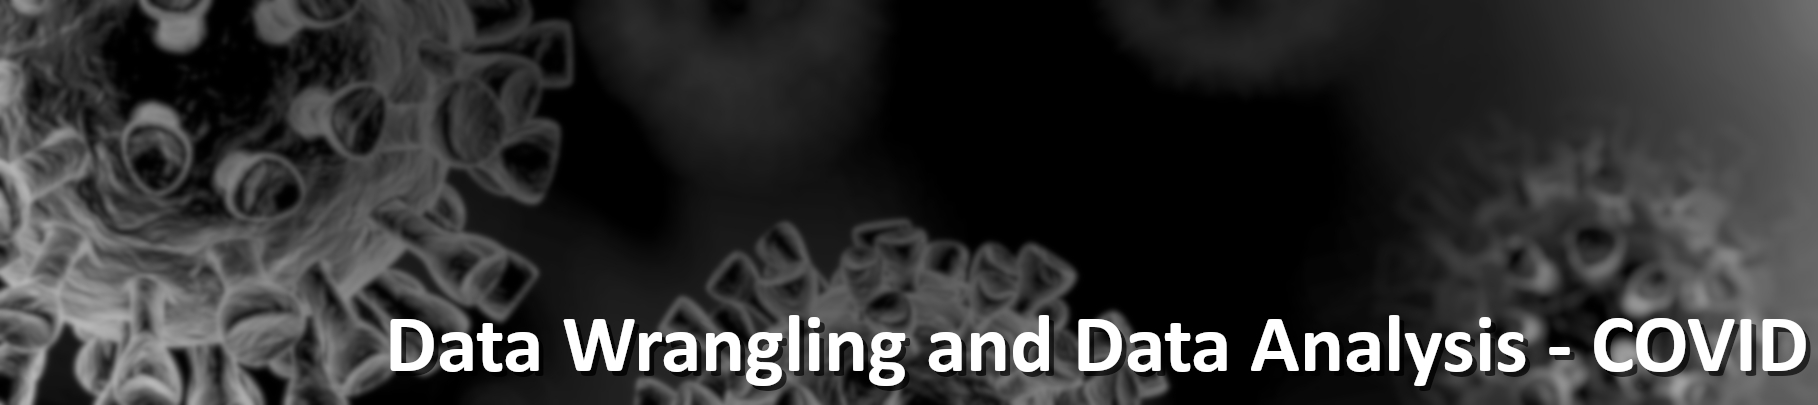

# O que é a COVID-19? #
&nbsp;


A **Covid-19** é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.

O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos.

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo o homem, camelos, gado, gatos e morcegos. Raramente os coronavírus de animais podem infectar pessoas e depois se espalhar entre seres humanos como já ocorreu com o MERS-CoV e o SARS-CoV-2. Até o momento, não foi definido o reservatório silvestre do SARS-CoV-2.


*Fonte: https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus*

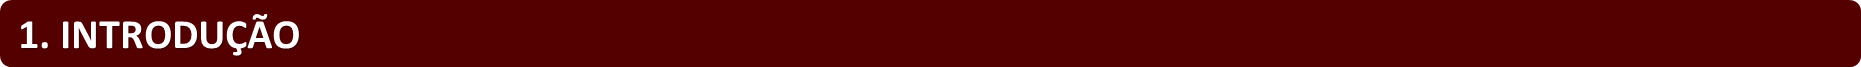

Para este projeto, fora selecionado o conjunto de dados do [COVID](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md), contendo um aglomerado dos relatórios diários de casos ao redor do mundo até o 1º dia de janeiro de 2022, os dados do *Dataset* estão distribuídos por Estado/Província, contendo o número acumulado de mortos e de casos confirmados.

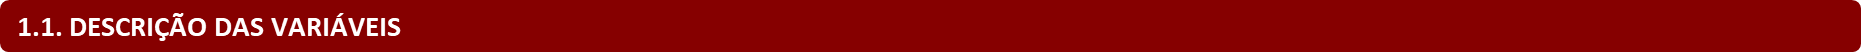

|       **Variável**      |                       **Descrição**                    |
|-------------------------|:------------------------------------------------------:|
|         **FIPS**        |   Código de Identificação dos Condados (Apenas EUA).   |
|        **Admin2**       |             Nome do município (Apenas EUA).            |
|    **Province_State**   |        Nome da província, estado ou dependência.       |
|    **Country_Region**   |                      Nome do país.                     |
|     **Last_Update**     |               Data da última atualização               |
|         **Lat**         |   Localização do País, Estado e/ou Região (Latitude).  |
|        **Long_**        |  Localização do País, Estado e/ou Região (Longitude).  |
|      **Confirmed**      |             Contagem de casos confirmados.             |
|        **Deaths**       |                   Contagem de mortes.                  |
|      **Recovered**      |                Contagem de recuperados.                |
|        **Active**       |                      Casos ativos.                     |
|     **Combined_Key**    | Combinação dos campos Province_State e Country_Region. |
|    **Incident_Rate**    |               Casos por 100.000 pessoas.               |
| **Case_Fatality_Ratio** |           Número de Mortes / Número de Casos.          |

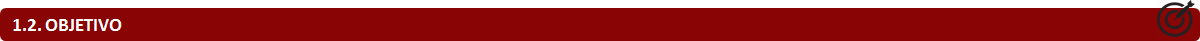

**Responder as seguintes questões:**


1. Quais são os países com um maior número de mortes e casos confirmados?
1. Quais são os países com um menor número de mortes e casos confirmados?
1. Quais são os países com a maior relação de mortes por casos confirmados?
1. QUal é a situação do Brasil diante os demais países?
1. Qual é a região do Brasil com maior índice de mortes e de casos confirmados?

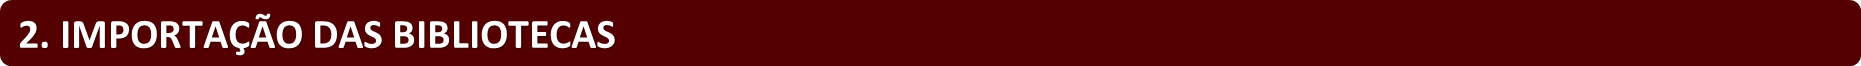

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
import seaborn as sns
import json
import sweetviz as sv
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.precision', 2)
pd.set_option('float_format', '{:.2f}'.format)

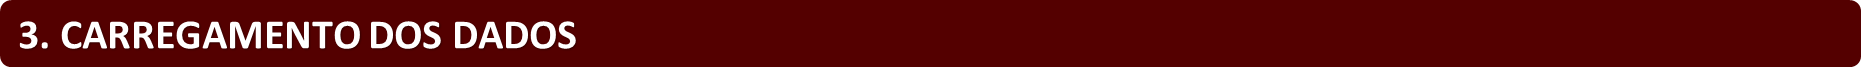

In [2]:
df = pd.read_csv('Arquivos/baseCOVID.csv')

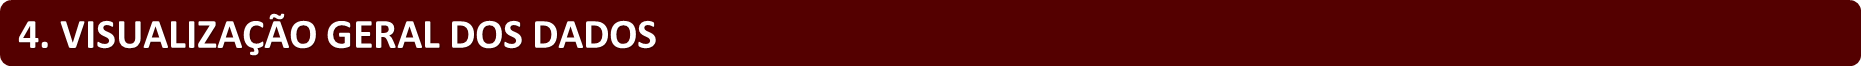

In [3]:
# Visualização das primeiras linhas do DataFrame (DF).
df.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-01 04:22:14,33.94,67.71,158084,7356,NaN,NaN,Afghanistan,406.09,4.65
1,NaN,NaN,NaN,Albania,2022-01-01 04:22:14,41.15,20.17,210224,3217,NaN,NaN,Albania,7305.02,1.53


In [4]:
# Tamanho da base de dados.
print(f'O DataFrame possui \033[1m{df.shape[0]} linhas\033[0m e \033[1m{df.shape[1]} colunas\033[0m.')

O DataFrame possui 4006 linhas e 14 colunas.


In [5]:
# Informações básicas do DF.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3832 non-null   object 
 3   Country_Region       4006 non-null   object 
 4   Last_Update          4006 non-null   object 
 5   Lat                  3916 non-null   float64
 6   Long_                3916 non-null   float64
 7   Confirmed            4006 non-null   int64  
 8   Deaths               4006 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4006 non-null   object 
 12  Incident_Rate        3915 non-null   float64
 13  Case_Fatality_Ratio  3966 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.3+ KB


In [6]:
# Quantidade de países únicos.
print(f'Há \033[1m{len(df.Country_Region.unique())}\033[0m países no DataFrame.')

Há 196 países no DataFrame.


In [7]:
# Visualização das variáveis númericas do DF.
print('-'*75, '\n', '\033[1mVariáveis Numéricas\033[0m'.center(75))
display(df.describe())
print('-'*75, '\n', '\033[1mVariáveis Categóricas\033[0m'.center(75))
display(df.describe(include='O'))

--------------------------------------------------------------------------- 
                         Variáveis Numéricas                        


,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3268.00,3916.00,3916.00,4006.00,4006.00,0.00,0.00,3915.00,3966.00
mean,32405.94,35.80,-71.35,71949.82,1357.41,NaN,NaN,15280.39,2.45
std,18056.38,13.25,54.90,405525.54,7391.70,NaN,NaN,5947.80,27.79
min,60.00,-52.37,-178.12,0.00,0.00,NaN,NaN,0.00,0.00
25%,19048.50,33.20,-96.60,2038.25,32.00,NaN,NaN,12455.09,1.11
50%,30068.00,37.90,-86.77,5765.50,93.00,NaN,NaN,16614.80,1.60
75%,47041.50,42.18,-77.39,23735.50,325.75,NaN,NaN,19128.02,2.21
max,99999.00,71.71,178.06,10988851.00,155205.00,NaN,NaN,57751.90,1520.62


--------------------------------------------------------------------------- 
                        Variáveis Categóricas                       


,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
count,3272,3832,4006,4006,4006
unique,1927,594,196,10,4006
top,Unassigned,Texas,US,2022-01-01 04:22:14,Afghanistan
freq,51,255,3279,3991,1


In [8]:
# Exibição das colunas ordenadas por quantidade de valores ausentes.
df.isnull().sum().sort_values(ascending=False)

Recovered              4006
Active                 4006
FIPS                    738
Admin2                  734
Province_State          174
Incident_Rate            91
Lat                      90
Long_                    90
Case_Fatality_Ratio      40
Country_Region            0
Last_Update               0
Confirmed                 0
Deaths                    0
Combined_Key              0
dtype: int64

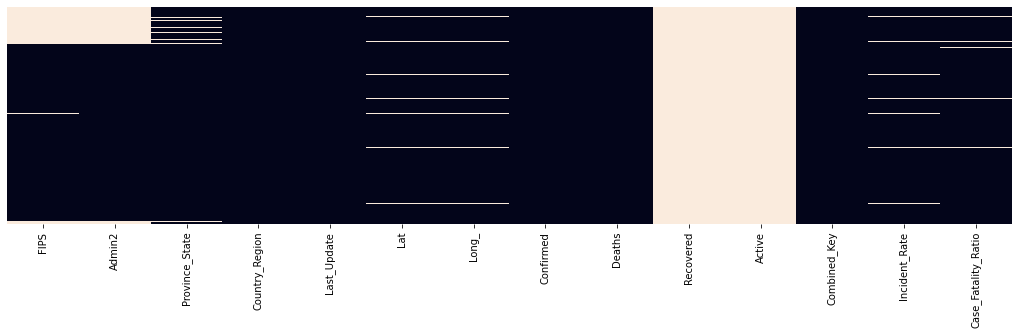

In [9]:
# Exibição dos valores ausentes plotados no gráfico de calor.
plt.figure(figsize=(18,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels='');

***
Podemos observar que o DF contém muitos valores ausentes, demonstrados pela parte clara do HeatMap acima, porém as variváveis que iremos utilizar em nossa análise estão sem valores nulos.
***

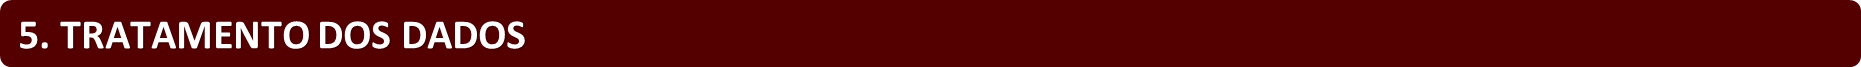

In [10]:
# Decidi excluir as colunas abaixo, por não as considerar importantes para nossa análise.
df.drop(['FIPS', 'Admin2', 'Combined_Key', 'Recovered', 'Active', 'Last_Update', 'Lat', 'Long_', 
         'Incident_Rate', 'Case_Fatality_Ratio'], axis=1, inplace=True)

In [11]:
# Com o intuito de facilitar a organização do DF, efetuado aqui a renomeação das colunas.
df.columns = ['Estado', 'Pais', 'CasosConfirmados', 'Mortes']

In [12]:
# Resultado do DF após a exclusão das colunas e renomeação.
df.head(3)

,Estado,Pais,CasosConfirmados,Mortes
0,NaN,Afghanistan,158084,7356
1,NaN,Albania,210224,3217
2,NaN,Algeria,218432,6276


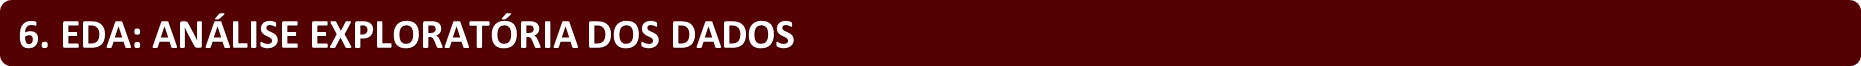

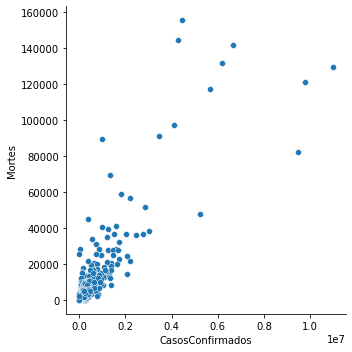

In [13]:
# Plotagem do gráfico para verificação da relação entre os Casos Confirmados e o total de Mortes.
sns.relplot(x='CasosConfirmados', y='Mortes', data=df)
plt.show()

***
Como era de se esperar, o gráfico deixa claro a correlação das variáveis "CasosConfirmados" e "Mortes".
***

In [14]:
analise = sv.analyze(df).show_html();

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


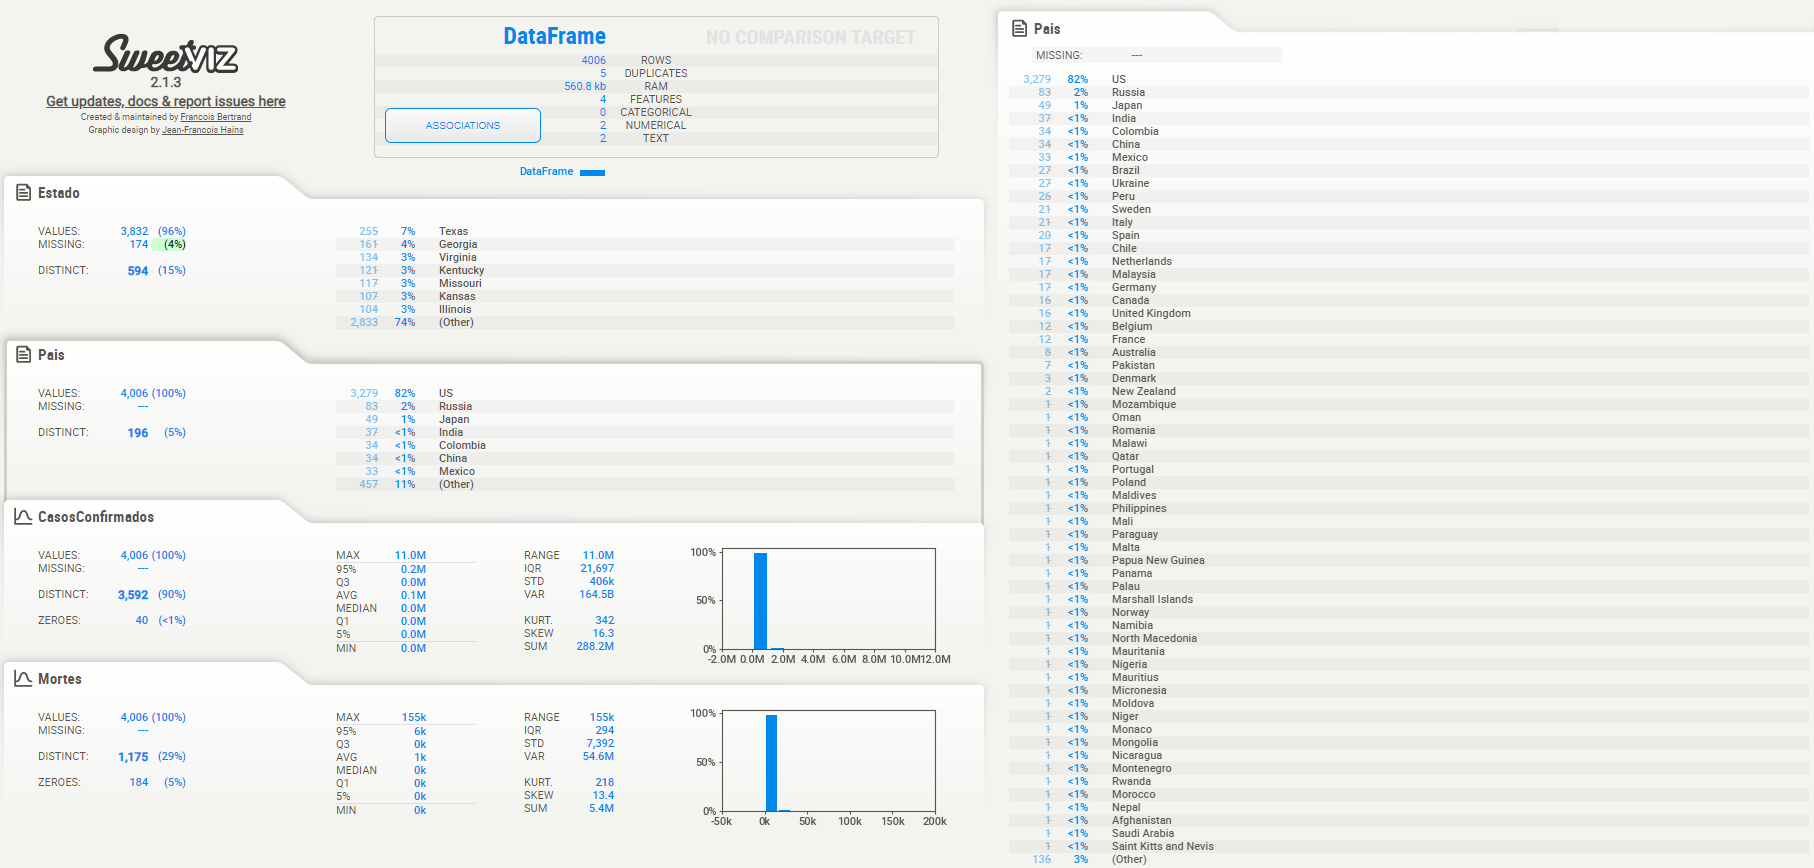

In [15]:
dfSemUS = df.loc[df.Pais != 'US']
comparacao = sv.compare([df, 'Com US'], [dfSemUS, 'Sem  US']).show_html();

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


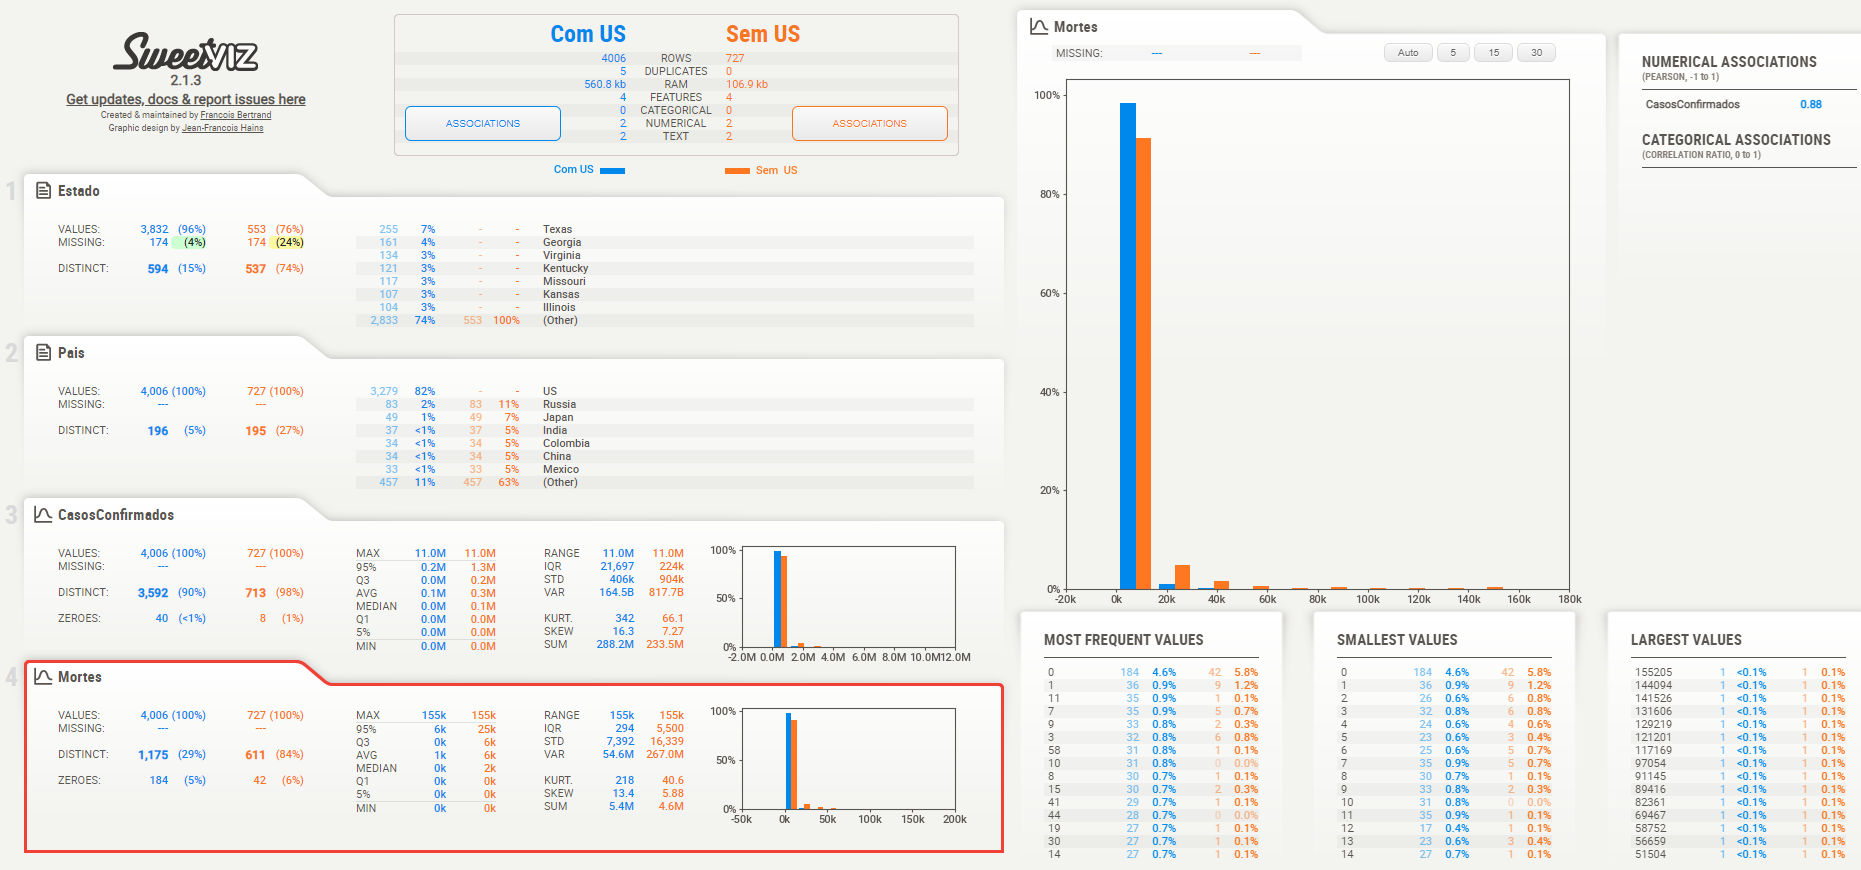

***
Imagens geradas em .HTML:
* Imagem 1. Principais características das variáveis contidas no DF, após sua transformação.
* Imagem 2. Comparativo entre o DF e o DF contendo apenas os Estados Unidos (US), responsável por cerca de 18% dos registros contidos na base.
***

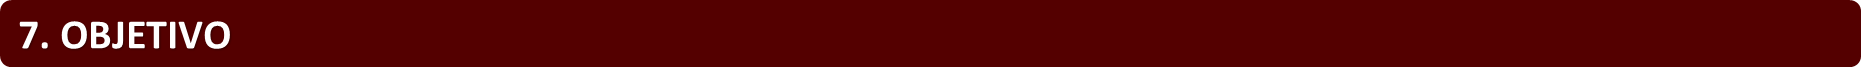

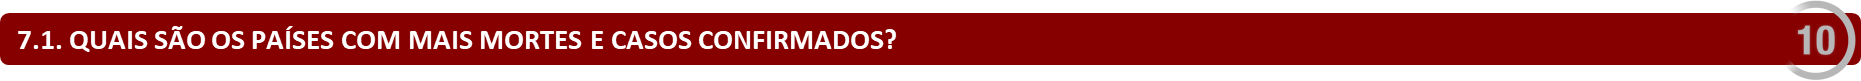

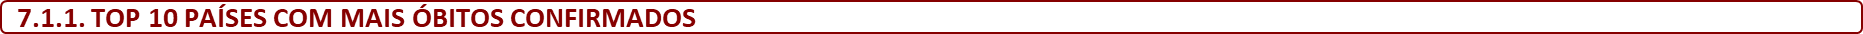

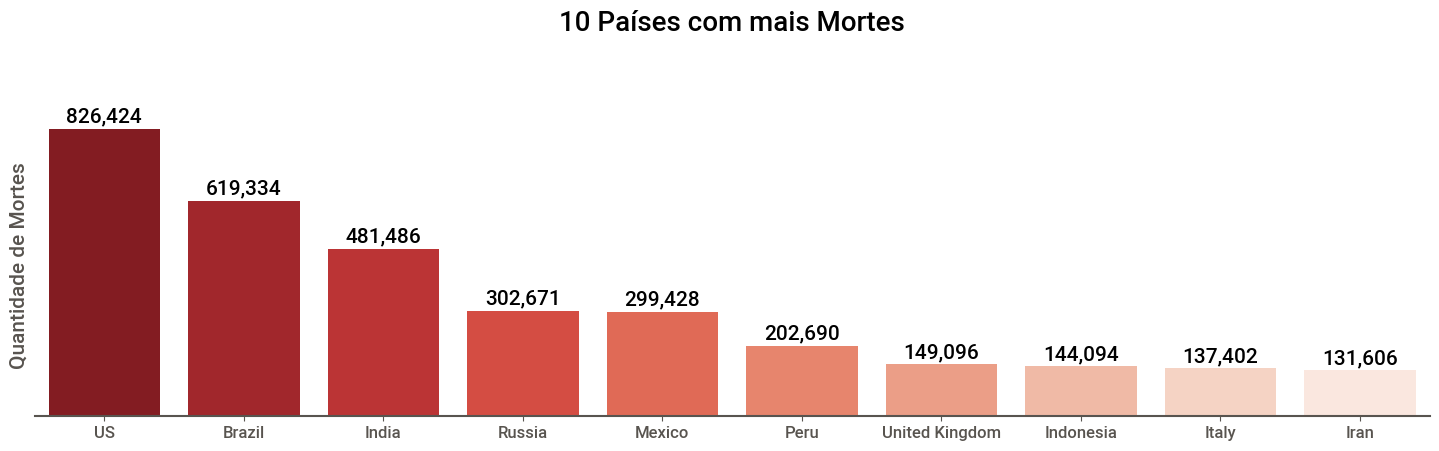

In [16]:
# Criação de um novo DF ordenado pela quantidade de mortes.
dfPaisMaisMortes = pd.DataFrame(df.groupby('Pais').Mortes.sum().
                                sort_values(ascending=False)[0:10]).reset_index()
# Plotagem do gráfico.
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Pais', y='Mortes', data=dfPaisMaisMortes, palette='Reds_r')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Mortes', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=12)
ax.set_title('10 Países com mais Mortes', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

***
O gráfico acima evidencia os países com mais mortes, sendo os Estados Unidos responsável pela maior quantidade de óbitos desde o ínicio da pandemia (ou pelo menos do registro dos dados).
***

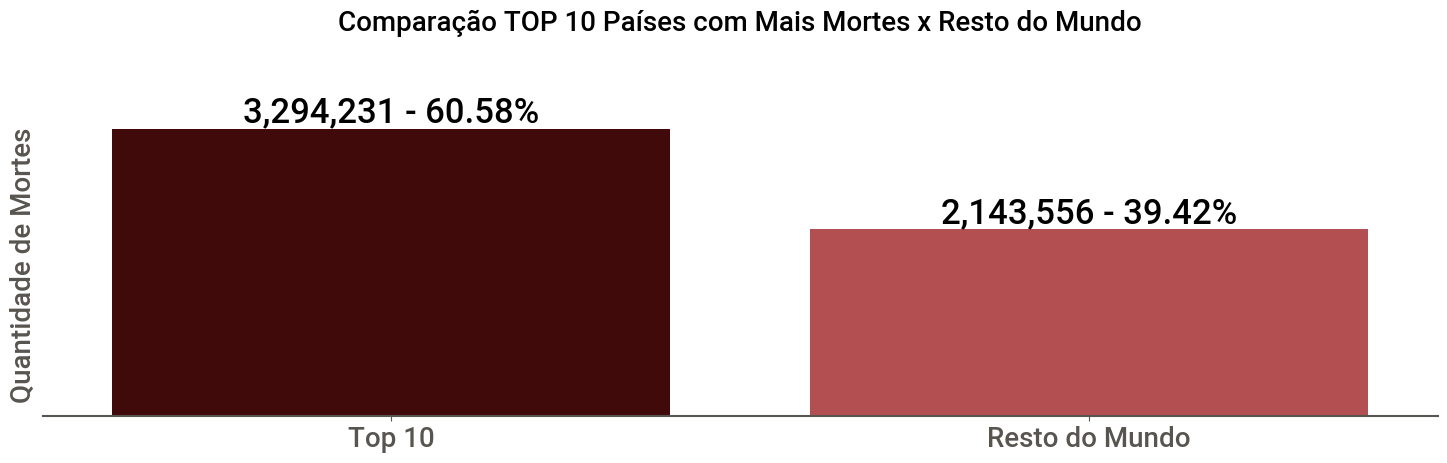

In [17]:
# Criação de um novo DF contendo o total de mortes dos países TOP 10 x total de mortes do Resto do Mundo.
dfComparacaoPaisMaisMortes = pd.DataFrame()
dfComparacaoPaisMaisMortes['Pais/Mundo'] = ''
dfComparacaoPaisMaisMortes['Mortes'] = ''
dfComparacaoPaisMaisMortes.loc[0] = ['Top 10', dfPaisMaisMortes.Mortes.sum()]
dfComparacaoPaisMaisMortes.loc[1] = ['Resto do Mundo', df.Mortes.sum() - dfPaisMaisMortes.Mortes.sum()]
dfComparacaoPaisMaisMortes['PercMorte'] = (dfComparacaoPaisMaisMortes.Mortes / 
                                           dfComparacaoPaisMaisMortes.Mortes.sum()) * 100
total = dfComparacaoPaisMaisMortes.Mortes.sum()
# Plotagem do gráfico.
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Pais/Mundo', y='Mortes', data=dfComparacaoPaisMaisMortes, palette=['#490102', '#C43E41'])
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Mortes', fontsize=20)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=20)
ax.set_title('Comparação TOP 10 Países com Mais Mortes x Resto do Mundo', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())) + 
                f' - {np.round(i.get_height()/total*100, 2)}%',
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=25)

***
Vemos que os 10 países com mais óbitos são responsáveis por cerca de 60% das mortes pelo mundo (registradas nessa base de dados). 
***

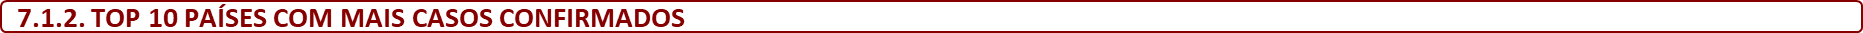

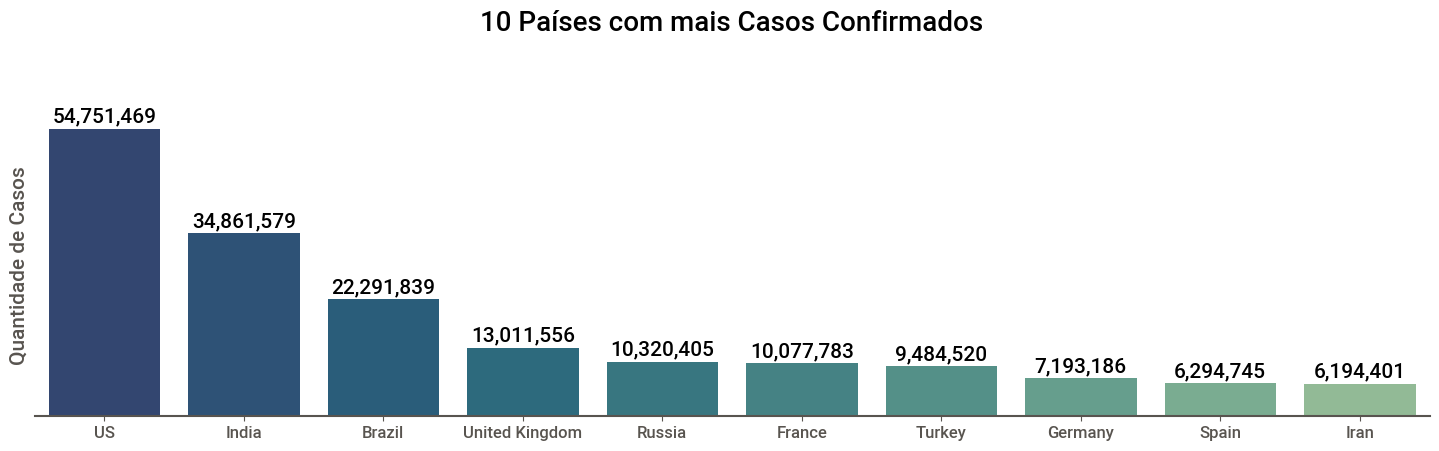

In [18]:
# Criação de um novo DF ordenado pela quantidade de casos confirmados.
dfPaisMaisCasos = pd.DataFrame(df.groupby('Pais').CasosConfirmados.sum()
                               .sort_values(ascending=False)[0:10]).reset_index()
# Plotagem do gráfico.
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Pais', y='CasosConfirmados', data=dfPaisMaisCasos, palette='crest_r')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Casos', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=12)
ax.set_title('10 Países com mais Casos Confirmados', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

***
Semelhante aos países que tiveram mais óbitos, podemos verificar que os Estados Unidos têm a maior quantidade de casos confirmados da doença. O que é preocupante é o caso do Peru, que aparece na 6ª posição dos casos de mortes confirmadas (202 mil pessoas) porém sequer aparece no gráfico acima.
***

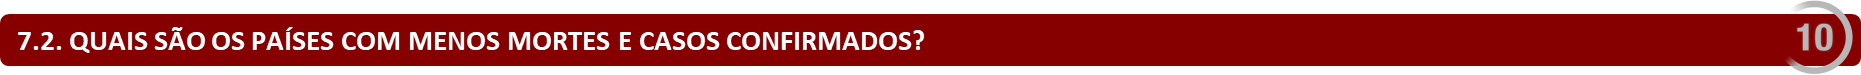

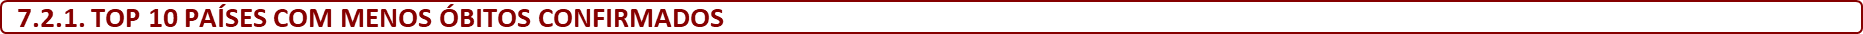

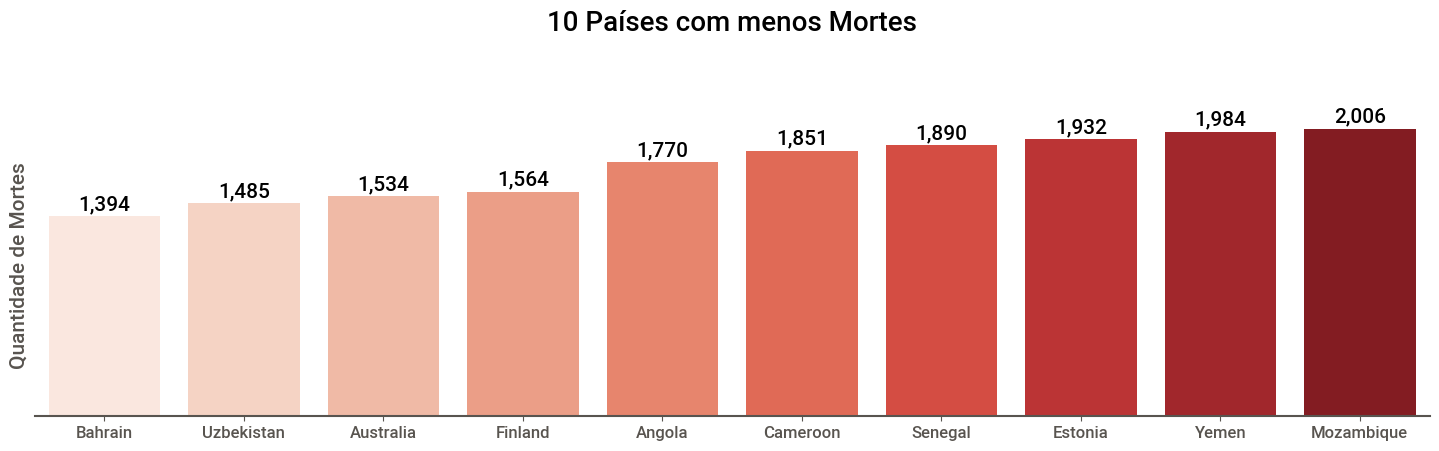

In [19]:
# Retirada a média de mortes para criação do DataFrame com os países cujo número de mortes seja superior a média.
dfPaisesMenosMortes = df.loc[df.Mortes >= df.Mortes.mean()]
dfPaisMenosMortes = pd.DataFrame(dfPaisesMenosMortes.groupby('Pais').Mortes.sum()
                                 .sort_values()[0:10]).reset_index()
# Plotagem do gráfico.
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Pais', y='Mortes', data=dfPaisMenosMortes, palette='Reds')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Mortes', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=12)
ax.set_title('10 Países com menos Mortes', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

***
Acima, listagem dos países com menos mortes a partir da quantidade média de mortes registradas na base de dados.
***

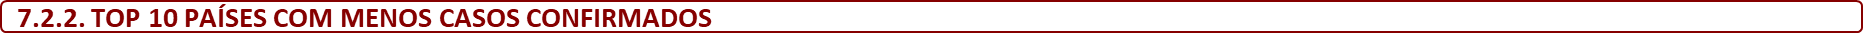

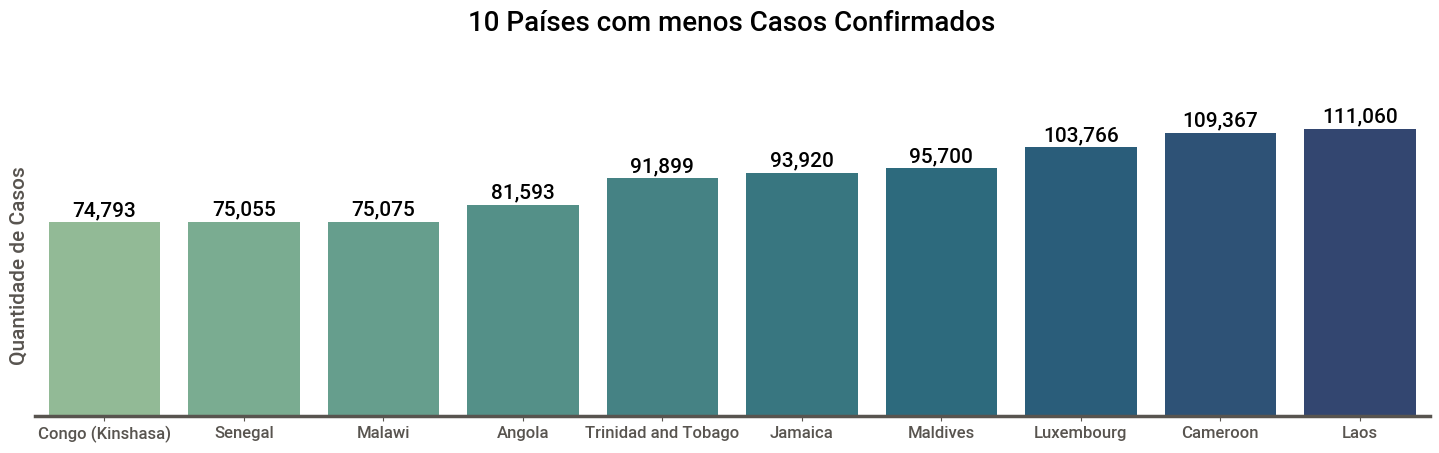

In [20]:
# Retirada a média de casos para criação do DataFrame com os países cujo número de casos seja superior a média.
dfPaisMenosCasos = df.loc[df.CasosConfirmados >= df.CasosConfirmados.mean()]
dfPaisMenosCasos = pd.DataFrame(dfPaisMenosCasos.groupby('Pais').CasosConfirmados.sum()
                                .sort_values()[0:10]).reset_index()

# Plotagem do gráfico.
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Pais', y='CasosConfirmados', data=dfPaisMenosCasos, palette='crest')
ax.set_xlabel(''), ax.set_ylabel('Quantidade de Casos', fontsize=15)
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=12)
ax.set_title('10 Países com menos Casos Confirmados', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

In [21]:
df[df.Pais == 'Congo (Kinshasa)']

,Estado,Pais,CasosConfirmados,Mortes
181,NaN,Congo (Kinshasa),74793,1205


***
Podemos observar que os quatro primeiros países estão com a quantidade de casos confirmados um pouco acima da média (71,949 Casos Confirmados), provavelmente pela falta de estrutura dos países africanos quanto a captura e fidelidade das informações obtidas. Destaca-se o caso do Congo (Kinshasa), o qual não consegui obter informações se os dados tratam apenas da capital ou de todo o território nacional.
***

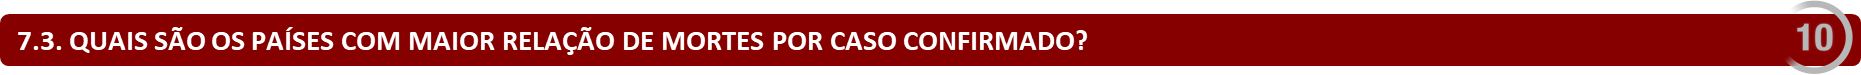

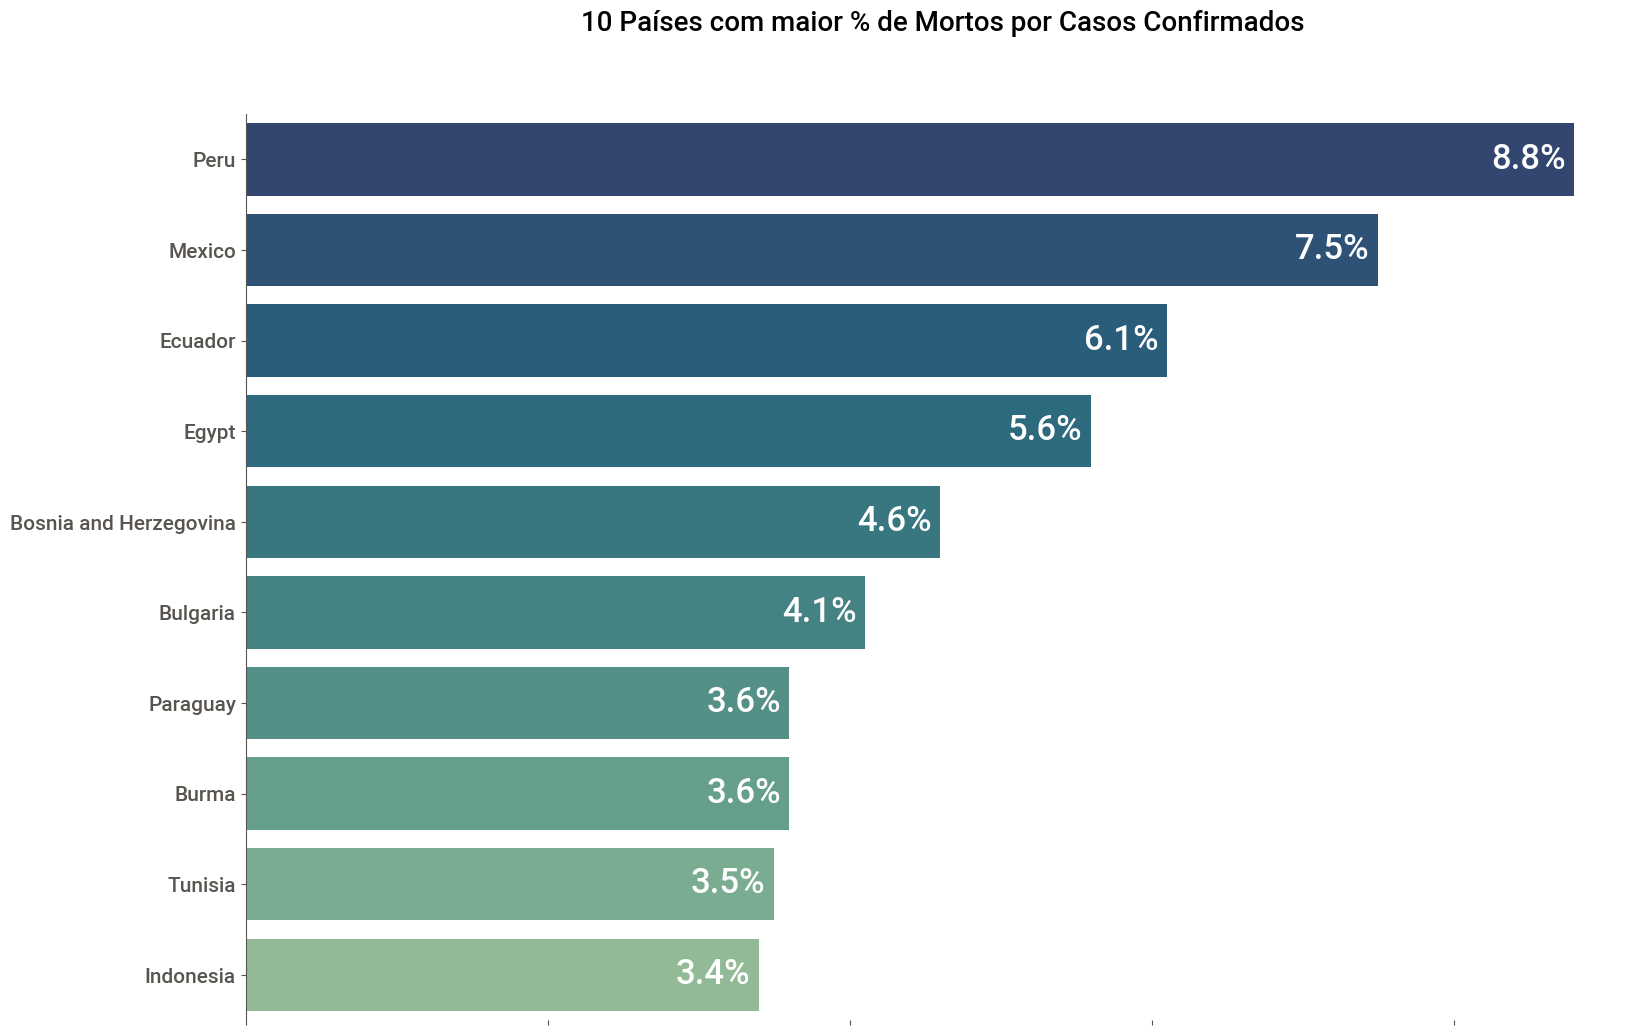

In [22]:
# Criando uma coluna de porcentagem de mortos/casos confirmados.
dfTodosPaises = df.groupby('Pais').sum()
dfTodosPaises = dfTodosPaises.loc[(dfTodosPaises.Mortes > 10000) & (dfTodosPaises.CasosConfirmados > 50000)]
dfTodosPaises['PorcentagemMortos'] = ((np.round(dfTodosPaises.Mortes / dfTodosPaises.CasosConfirmados, 3))*100)
dfPaisPorcMortos = dfTodosPaises['PorcentagemMortos'].sort_values(ascending=False)[0:10].reset_index()
# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(18, 12))
sns.barplot(y='Pais', x='PorcentagemMortos', data=dfPaisPorcMortos, palette='crest_r')
ax.tick_params(axis='x', labelbottom=False), ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(''), ax.set_ylabel('')
ax.set_title('10 Países com maior % de Mortos por Casos Confirmados', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'bottom']:    ax.spines[axis].set_color(None)
valores, total = [], 0
for numero in dfPaisPorcMortos.PorcentagemMortos:        
    valores.append(np.round(numero, 2))
    total += numero     
for i, v in enumerate(valores):
    plt.text(v - 0.55, i + 0.1 , s=(str(v) + '%'), color='w', fontsize=25)

***
Como exposto acima, o Peru é o país com maior quantidade de mortes/casos confirmados.
***

In [23]:
totalMortesPeru = df.Mortes.loc[df.Pais == 'Peru'].sum()
totalCasosConfirmadosPeru = df.CasosConfirmados.loc[df.Pais == 'Peru'].sum()
print(f'\033[1;31mMorreram {totalMortesPeru:,}\033[m pessoas no Peru', end=' de')
print(f'\033[1;34m {totalCasosConfirmadosPeru:,} casos confirmados\033[m .')

Morreram 202,690 pessoas no Peru de 2,296,831 casos confirmados .


***
Por meio do gráfico e dos dados obtidos acima, constatamos que o Peru foi o país que teve mais mortos (202,690) por caso confirmado (2,296,831) representando quase 9% de taxa.
***

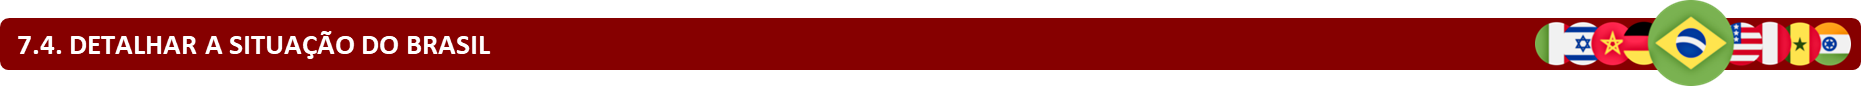

In [24]:
# Criação do Dataset dfBrasil com as informação do país e posterior visualização das primeiras linhas.
dfBrasil = df[df.Pais == 'Brazil']
# Ordenação por ordem alfabética pela coluna estado.
dfBrasil.sort_values(by=['Estado'], inplace=True)
dfBrasil.head(2)

,Estado,Pais,CasosConfirmados,Mortes
41,Acre,Brazil,88384,1851
42,Alagoas,Brazil,242080,6383


In [25]:
# Abertura do arquivo json que desenhará os estados no mapa.
geo_json_data = json.load(open('Arquivos/br_estados.json'))

In [26]:
# Criação de chaves contendo a quantidade de mortes e casos por estado para criação de rotulos para os mapas.
listaMortesEstado = list(dfBrasil.Mortes)
listaCasosEstado = list(dfBrasil.CasosConfirmados)
geo2 = geo_json_data.copy()

for i in range(27):
    geo2['features'][i]['properties']['mortes'] = '{0:,}'.format(listaMortesEstado[i]).replace(',', '.')
    geo2['features'][i]['properties']['%mortes'] = '{:.2%}'.format(listaMortesEstado[i]/sum(listaMortesEstado))
    geo2['features'][i]['properties']['casos'] = '{0:,}'.format(listaCasosEstado[i]).replace(',', '.')
    geo2['features'][i]['properties']['%casos'] = '{:.2%}'.format(listaCasosEstado[i]/sum(listaCasosEstado))
    #pprint(geo2['features'][i]['properties'])    

In [27]:
# Instanciando os mapas.
mapaMortes = folium.Map(location=[-20.77972,-55.92972], zoom_start = 4,
                        control_scale=False, prefer_canvas=False)
mapaCasos = folium.Map(location=[-20.77972,-55.92972], zoom_start = 4,
                       control_scale=False, prefer_canvas=True)

In [28]:
# Criação das variváveis LogMortes e LogCasos para uma melhor representação nos gráficos.
dfBrasil['LogMortes'] = np.log(dfBrasil['Mortes'])
dfBrasil['LogCasos'] = np.log(dfBrasil['CasosConfirmados'])

In [29]:
# Criação das camadas no mapa representando o Log das Mortes por Estado
mapaMortes = folium.Map(width='100%', height='100%', location=[-20.77972,-55.92972],
                        zoom_start = 4, scrollWheelZoom=False, dragging=False)
choropleth = folium.Choropleth(geo_data = geo2,
                               data = dfBrasil,
                               columns = ['Estado', 'LogMortes'],
                               key_on = 'properties.name',
                               fill_color = 'Reds', 
                               fill_opacity = 1,
                               line_color = 'white',
                               line_opacity = 1,
                               legend_name = 'Log das Mortes Confirmadas',
                               highlight=True).add_to(mapaMortes)
style_function = "font-size: 12px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name', 'mortes', '%mortes'],
                                   aliases=['Estado: ', 'Total Mortes: ', '% Mortes: '],
                                   style=style_function, labels=True));
#mapaMortes.save("mapaMortes.html")
#mapaMortes #Linha comentada em razão do tamanho do arquivo gerado.

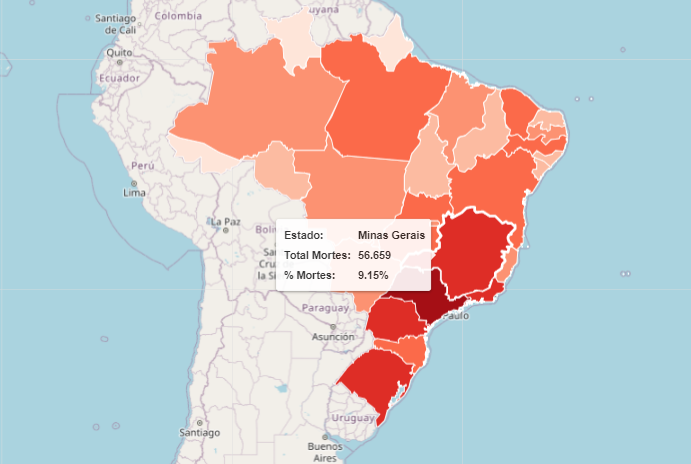

***
Fica nítido que a Região Sudeste, encabeçada pelo Estado de São Paulo é a região que mais teve mortes pela doença.
***

In [30]:
# Criação das camadas no mapa representando o Log dos Casos Confirmados por Estado.
mapaCasos = folium.Map(width='100%', height='100%', location=[-20.77972,-55.92972],
                       zoom_start = 4, scrollWheelZoom=False, dragging=False)
choropleth = folium.Choropleth(geo_data = geo_json_data,                               
                               data = dfBrasil,
                               columns = ['Estado', 'LogCasos'],
                               key_on = 'properties.name',
                               fill_color = 'Blues', 
                               fill_opacity = 1,
                               line_color = 'white',
                               line_opacity = 1,
                               legend_name = 'Log dos Casos Confirmados',
                               highlight=True).add_to(mapaCasos)
style_function = "font-size: 12px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name', 'casos', '%casos'],
                                   aliases=['Estado: ', 'Total Casos: ', '% Casos: '],
                                   style=style_function, labels=True));
#mapaCasos.save("mapaCasos.html")
#mapaCasos #Linha comentada em razão do tamanho do arquivo gerado.

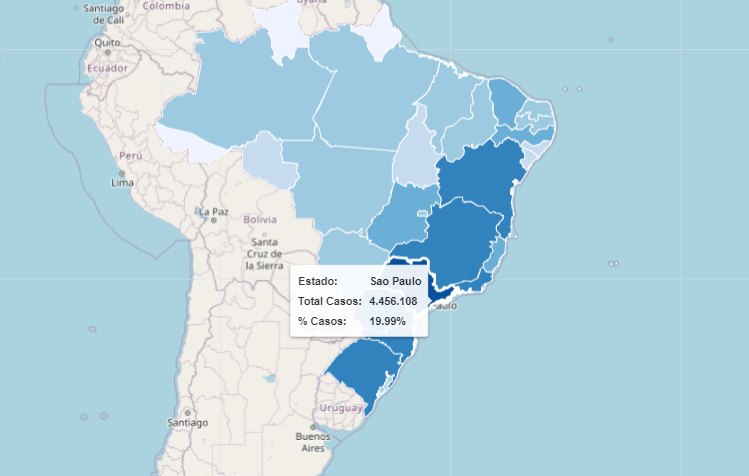

***
O gráfico de Casos Confirmados assemelha-se muito ao de Mortes, o que mais uma vez prova a correlação entre o número de casos e o número de mortes pela doença.
***

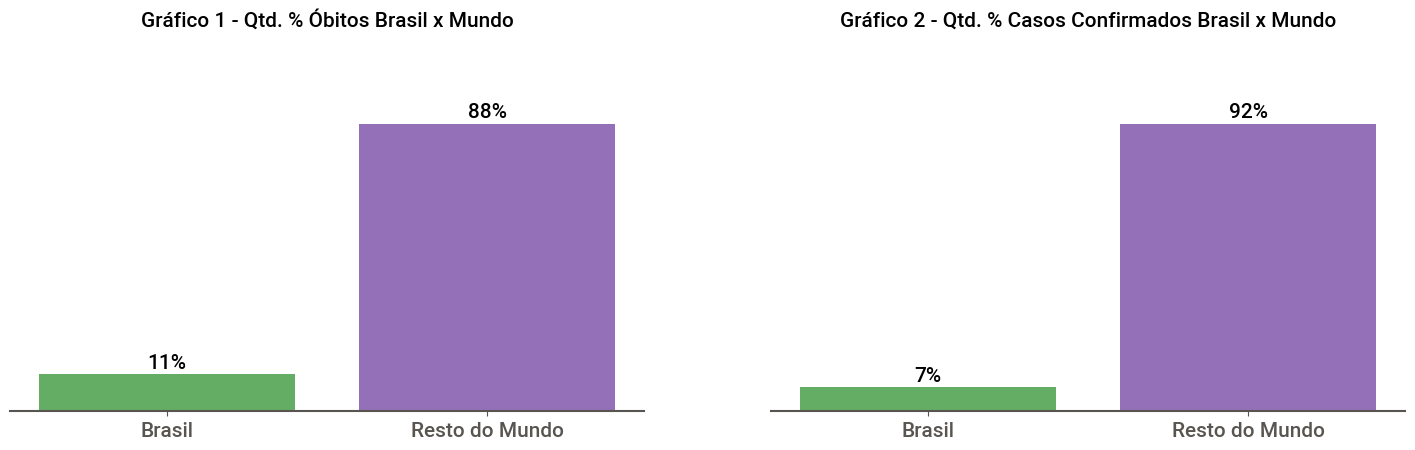

In [31]:
# Criação de DF e variváveis auxiliares para plotagem do gráfico comparativo Braxil x Mundo.
dfRestoMundo = df.loc[df.Pais != 'Brazil']
PercRestoMundoMortes = dfRestoMundo.Mortes.sum() / df.Mortes.sum() * 100
PercRestoMundoCasos =  dfRestoMundo.CasosConfirmados.sum() / df.CasosConfirmados.sum() * 100
PercBrasilMortes = dfBrasil.Mortes.sum() / df.Mortes.sum() * 100
PercBrasilCasos = dfBrasil.CasosConfirmados.sum() / df.CasosConfirmados.sum() * 100

# Plotagem do gráfico.
labels = ['Brasil', 'Resto do Mundo']
y_mortes = [PercBrasilMortes, PercRestoMundoMortes]
y_casos = [PercBrasilCasos, PercRestoMundoCasos]

f, (gra1, gra2) = plt.subplots(1, 2, figsize=(18, 4))
gra1.bar(labels, y_mortes, alpha=0.7, color=['forestgreen', 'rebeccapurple'])
plt.sca(gra1), gra1.set_ylabel(''), gra1.set_xlabel('')
gra1.set_title('Gráfico 1 - Qtd. % Óbitos Brasil x Mundo', fontsize=15, pad=60)
plt.tick_params(axis='y', labelleft=False, left=None)
plt.xticks([0, 1], labels, fontsize=15)

gra2.bar(labels, y_casos, alpha=0.7, color=['forestgreen', 'rebeccapurple'])
plt.sca(gra2), gra2.set_ylabel(''), gra2.set_xlabel('')
gra2.set_title('Gráfico 2 - Qtd. % Casos Confirmados Brasil x Mundo', fontsize=15, pad=60)
plt.xticks([0, 1], labels, fontsize=15);
plt.tick_params(axis='y', labelleft=False, left=None)

for axis in ['top', 'right', 'left']:    
    gra1.spines[axis].set_color(None)
    gra2.spines[axis].set_color(None)
gra1.spines['bottom'].set_linewidth(1.5)
gra2.spines['bottom'].set_linewidth(1.5)
    
for i in gra1.patches:
    gra1.annotate(f'{int(i.get_height())}%',
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

for i in gra2.patches:
    gra2.annotate(f'{int(i.get_height())}%',
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

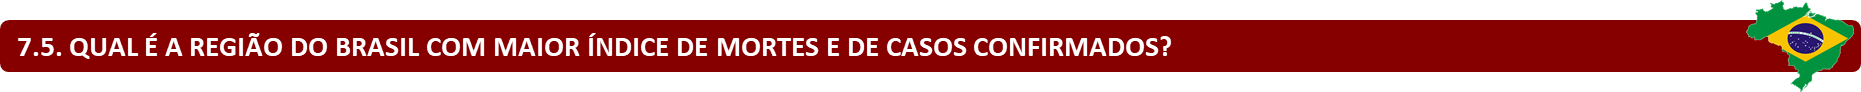

In [32]:
# Carregamento do arquivo CSV que relacionará o Estado à sua Região correspondente.
dfEstadoRegiao = pd.read_csv('Arquivos/EstadoRegiao.csv', sep=';')
dfEstadoRegiao.head(2)

,Estado,Regiao
0,Acre,Norte
1,Alagoas,Nordeste


In [33]:
# Unificando o novo DF com o DF base Brasil.
dfBrasil = pd.merge(dfBrasil, dfEstadoRegiao)

In [34]:
# Agrupando os Estados por Região
dfRegiao = dfBrasil.groupby('Regiao').sum().reset_index()

In [35]:
# Excluindo as colunas LogMortes e LogCasos, pois agora iremos trabalhar com os valores absolutos.
dfRegiao.drop(['LogMortes', 'LogCasos'], axis=1, inplace=True)

In [36]:
# Visualização do DFRegiao
dfRegiao.head()

,Regiao,CasosConfirmados,Mortes
0,Centro-Oeste,2406002,59588
1,Nordeste,4950128,120018
2,Norte,1923966,47550
3,Sudeste,8662789,294659
4,Sul,4348954,97519


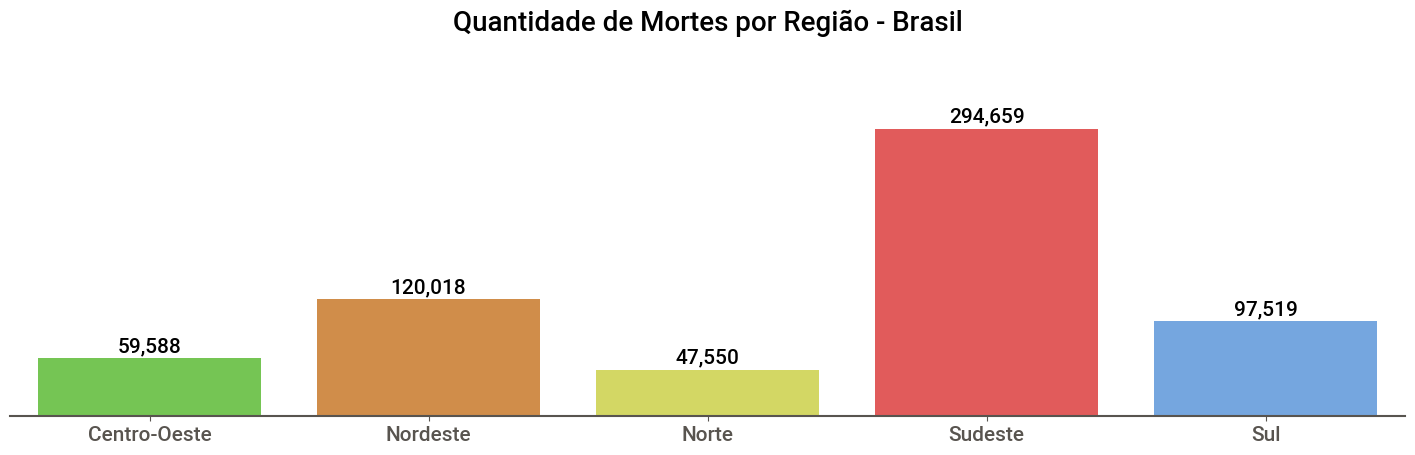

In [37]:
# Plotagem do gráfico com a relação de mortes por cada Região do Brasil.

fig, ax = plt.subplots(figsize=(18, 4))
colors = ['#66D637', '#E68728', '#E4E948', '#F83A3A', '#5B9FF1']
sns.barplot(x='Regiao', y='Mortes', data=dfRegiao, alpha=0.95, palette=colors)
ax.set_xlabel(''), ax.set_ylabel('')
ax.tick_params(axis='y', labelleft=False, left=None), ax.tick_params(axis='x', labelsize=15)
ax.set_title('Quantidade de Mortes por Região - Brasil', fontsize=20, pad=60)
ax.spines['bottom'].set_linewidth(1.5)
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)

for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,4.5),
    textcoords='offset points', fontsize=15)

***
Reiterando o exposto acima, confirma-se que a Região Sudeste é a que teve mais óbitos pela doença, representando quase 50% dos casos em nosso país.
***

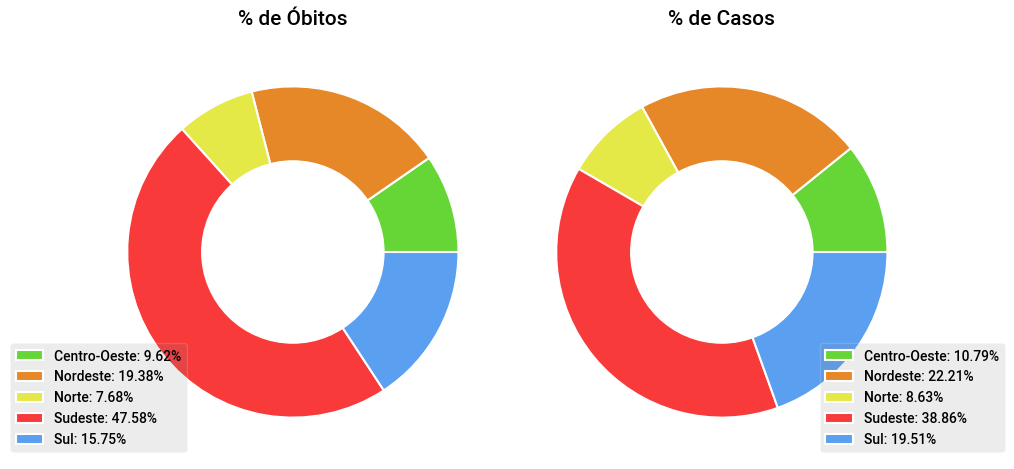

In [38]:
# Plotagem do gráfico com a relação de mortes por cada Região do Brasil.

dfRegiao['PercMorte'] = ((dfRegiao.Mortes / dfRegiao.Mortes.sum()) * 100)
dfRegiao['PercCasos'] = ((dfRegiao.CasosConfirmados / dfRegiao.CasosConfirmados.sum()) * 100)
listaLabelsMortes = list()
listaLabelsCasos = list()
for regiao in dfRegiao.Regiao:
    listaLabelsMortes.append(
        f'{regiao}: {np.round(dfRegiao.PercMorte.loc[dfRegiao.Regiao == regiao].values[0], 2)}%')
    listaLabelsCasos.append(
        f'{regiao}: {np.round(dfRegiao.PercCasos.loc[dfRegiao.Regiao == regiao].values[0], 2)}%')
    
f, (gra1, gra2) = plt.subplots(1, 2, figsize=(10, 5))

gra1.pie(dfRegiao.PercMorte, wedgeprops={'linewidth':1.5, 'edgecolor': 'white'}, colors=colors)
gra1.set_title('% de Óbitos', fontsize=15, pad=15)
circulo = plt.Circle((0,0), 0.55, color='white')
gra1.add_artist(circulo)
gra1.legend(listaLabelsMortes, loc=3, bbox_to_anchor=(-0.2, 0), labelspacing = 0.5, edgecolor = 'w', 
           facecolor = 'gray', framealpha = 0.15)

gra2.pie(dfRegiao.PercCasos, wedgeprops={'linewidth':1.5, 'edgecolor': 'white'}, colors=colors)
gra2.set_title('% de Casos', fontsize=15, pad=15)
circulo = plt.Circle((0,0), 0.55, color='white')
gra2.add_artist(circulo)
gra2.legend(listaLabelsCasos, loc=4, bbox_to_anchor=(1.2, 0), labelspacing = 0.5, edgecolor = 'w', 
           facecolor = 'gray', framealpha = 0.15)
plt.tight_layout()

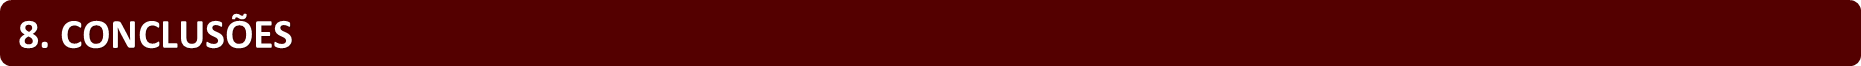

***
* Os dados afirmam que a doença já matará mais de 5 milhões de pessoas ao redor do globo.


* A Covid-19 é extremamente contagiosa, haja vista o número de infectados relatados até então, cerca de 290 milhões de pessoas.


* O Brasil, "liderado" pela Região Sudeste, até o momento é um dos países que mais sofreu com a doença, sendo responsável por 11 % dos casos de óbitos registrados no mundo.


* Acredito que o ***Dataset***, apesar de possuir uma boa quantidade de dados, não traz plenamente a realidade, uma vez que manter as informações sempre atualizadas é extremamente complexo, principalmente em locais com estruturas precárias, como em diversos países de 3º mundo, e em países de 2º mundo, onde as infomações nem sempre são divulgadas.


* Em que pese a limitação exposta, creio que os resultados disponibilizados aqui, para uma breve análise da doença, foram satisfatórios.
***

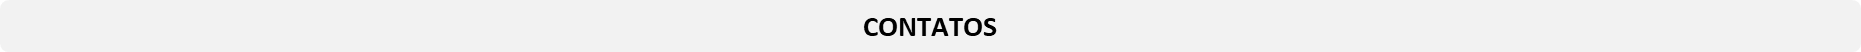

|   Github	| Linkedin   	| Kaggle    	|   E-mail	|
|---	|---	|---	|---	|
|   [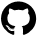](https://github.com/ThiagoFerreiraWD)	|   [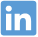](https://www.linkedin.com/in/tferreirasilva)	|   [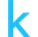](https://www.kaggle.com/thiagoferreirasilva)	|   [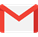](mailto:thiago.ferreirawd@gmail.com)	|

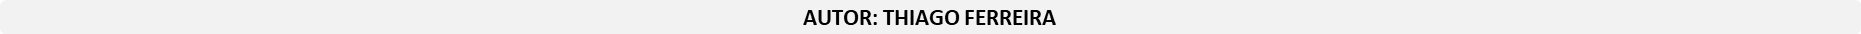